# 1.	Research questions, select analyses, import data

### a. Define research questions

In [1]:
#RQ1: How do customers cluster when we consider the how recently they made a purchase, the frequency of their purchases, and the monetary value of their purchase history?

### b.	Select analyses to answer research questions

In [2]:
#RQ1: K-Means Clustering

### c.	Import libraries

In [3]:
#Import usual Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly as py
%matplotlib inline
import datetime as dt
import os
import winsound

### d. Import data

In [4]:
#Import the data from online and then get the data from one excel sheet
import requests
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx'
r = requests.get(url)
open('online_retail_II.xlsx','wb').write(r.content)
data1 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2009-2010')
data1.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom


In [5]:
#Get the data from a second excel sheet
data2 = pd.read_excel('online_retail_II.xlsx', sheet_name = 'Year 2010-2011')
data2.head(2)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
#Combine the data from both excel sheets by adding rows of one to the other
#Reorder the rows ascending based on date
#Check the beginning of the data frame
df=(pd.concat([data1,data2], axis=0)).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
#Get the number of rows and columns of the data
df.shape

(1067371, 8)

### e. Select a sample

In [8]:
#Take a random sample of 10% of the data to use for faster initial analysis.
#See how many rows of data you have now
df = df.sample(frac=0.1,random_state=101)
print(len(df))

106737


# 2.	Clean Columns

### a. Remove unnecessary columns

In [9]:
#Get a list of the columns
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [10]:
#Drop the columns that we don't need in the analysis.
#Check the result
df=df.drop('Description', axis=1).sort_values(['InvoiceDate'],ascending=True)
df.head(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
9,489435,22349,12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom
15,489436,84879,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom
13,489436,21755,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom
53,489437,22112,3,2009-12-01 09:08:00,4.95,15362.0,United Kingdom
73,489439,22139,9,2009-12-01 09:28:00,4.95,12682.0,France


### b. Rename columns as desired

In [11]:
# Rename columns for clarity and make the changes permenant
df.rename(columns = {'InvoiceDate': 'Date', 'Invoice': 'InvoiceNo', 'Customer ID': 'CustomerID'}, inplace=True)
df.head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
9,489435,22349,12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom
15,489436,84879,16,2009-12-01 09:06:00,1.69,13078.0,United Kingdom
13,489436,21755,18,2009-12-01 09:06:00,5.45,13078.0,United Kingdom
53,489437,22112,3,2009-12-01 09:08:00,4.95,15362.0,United Kingdom
73,489439,22139,9,2009-12-01 09:28:00,4.95,12682.0,France


### c. Change date format of a column

In [12]:
# Convert the Date column to show the date only and omit the time.
from datetime import datetime
df["Date"] = df["Date"].dt.date
df.head(2)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
9,489435,22349,12,2009-12-01,3.75,13085.0,United Kingdom
15,489436,84879,16,2009-12-01,1.69,13078.0,United Kingdom


### d. Check for typos in a column with text

In [13]:
#List the values of a categorical variable column.
#Sort alphabetically
#Check for any misspellings causing duplicate category names.
df['Country'].value_counts().sort_index(ascending=True)

Australia                 202
Austria                    83
Bahrain                    13
Belgium                   322
Bermuda                     4
Brazil                      4
Canada                     17
Channel Islands           169
Cyprus                    126
Czech Republic              4
Denmark                    76
EIRE                     1742
European Community          6
Finland                   113
France                   1419
Germany                  1768
Greece                     68
Hong Kong                  32
Iceland                    21
Israel                     43
Italy                     141
Japan                      68
Korea                      10
Lebanon                     7
Lithuania                  23
Malta                      30
Netherlands               534
Nigeria                     4
Norway                    150
Poland                     53
Portugal                  261
RSA                        17
Singapore                  40
Spain     

In [14]:
#Replace any misspelled values with the correct spellings and check the new values. Also prevent a warning from annoying you.
pd.options.mode.chained_assignment = None
df['Country'].replace(['Czech Republic'],'Czechia',inplace=True)
df['Country'].value_counts()

United Kingdom          98139
Germany                  1768
EIRE                     1742
France                   1419
Netherlands               534
Spain                     381
Belgium                   322
Switzerland               322
Portugal                  261
Australia                 202
Channel Islands           169
Norway                    150
Italy                     141
Sweden                    134
Cyprus                    126
Finland                   113
Austria                    83
Denmark                    76
Unspecified                73
Japan                      68
Greece                     68
United Arab Emirates       55
Poland                     53
USA                        52
Israel                     43
Singapore                  40
Hong Kong                  32
Malta                      30
Lithuania                  23
Iceland                    21
RSA                        17
Canada                     17
Bahrain                    13
Korea     

### e. Remove/replace null data in a column

In [15]:
#Get the total number of null values in each column.
df.isnull().sum()

InvoiceNo         0
StockCode         0
Quantity          0
Date              0
Price             0
CustomerID    24478
Country           0
dtype: int64

In [16]:
#Calculate the percentage of null values in each column, list descending, and format the result to two decimal places.
(df.isnull().sum()/len(df)).sort_values(ascending=False).apply('{:,.2%}'.format)

CustomerID    22.93%
InvoiceNo      0.00%
StockCode      0.00%
Quantity       0.00%
Date           0.00%
Price          0.00%
Country        0.00%
dtype: object

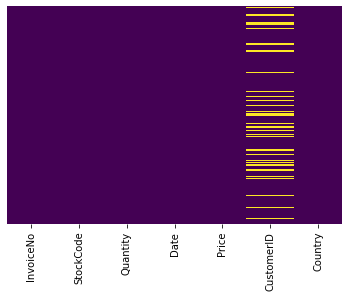

In [17]:
#See where we are missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [18]:
#Decide to remove or replace null values (replace through imputation for each column)
#We decide to remove all rows with null values. 
#Remove nulls then check the result.
df.dropna(inplace=True)
df.isnull().sum()

InvoiceNo     0
StockCode     0
Quantity      0
Date          0
Price         0
CustomerID    0
Country       0
dtype: int64

In [19]:
#See the number of rows and columns we have now.
df.shape

(82259, 7)

### f. Reformat column data types as needed

In [20]:
#Check the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82259 entries, 9 to 541880
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   InvoiceNo   82259 non-null  object 
 1   StockCode   82259 non-null  object 
 2   Quantity    82259 non-null  int64  
 3   Date        82259 non-null  object 
 4   Price       82259 non-null  float64
 5   CustomerID  82259 non-null  float64
 6   Country     82259 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 5.0+ MB


In [21]:
#Change a column's data type and check to see that it changed.
df = df.astype({"CustomerID": 'int64', "Date": 'datetime64[ns]'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82259 entries, 9 to 541880
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   InvoiceNo   82259 non-null  object        
 1   StockCode   82259 non-null  object        
 2   Quantity    82259 non-null  int64         
 3   Date        82259 non-null  datetime64[ns]
 4   Price       82259 non-null  float64       
 5   CustomerID  82259 non-null  int64         
 6   Country     82259 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.0+ MB


# 3. Clean Rows

### a. Remove unnecessary rows for categorical variables

In [22]:
#See the unique values in a column
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'EIRE',
       'Portugal', 'Japan', 'Poland', 'Channel Islands', 'Netherlands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Denmark', 'United Arab Emirates', 'Italy', 'Switzerland',
       'Sweden', 'USA', 'Finland', 'Unspecified', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Israel', 'Thailand', 'Lithuania',
       'Nigeria', 'West Indies', 'Brazil', 'Korea', 'Canada', 'Iceland',
       'Lebanon', 'Czechia', 'European Community'], dtype=object)

In [23]:
#Remove rows for the value of a category that we do not need. 
#Keep only the rows in the data that do not include a certain categorical value in a column.
#Check the result
df=df[~df['Country'].isin(['Unspecified'])]
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Germany', 'EIRE',
       'Portugal', 'Japan', 'Poland', 'Channel Islands', 'Netherlands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Denmark', 'United Arab Emirates', 'Italy', 'Switzerland',
       'Sweden', 'USA', 'Finland', 'Malta', 'RSA', 'Singapore', 'Bahrain',
       'Israel', 'Thailand', 'Lithuania', 'Nigeria', 'West Indies',
       'Brazil', 'Korea', 'Canada', 'Iceland', 'Lebanon', 'Czechia',
       'European Community'], dtype=object)

### b. Remove unnecessary rows of numerical data

In [24]:
#Remove rows of items that were returned that have a 'C' in the stockcode.
#See how many rows are left.
df = df[~df['InvoiceNo'].str.contains('C', na=False)]
df.shape

(80339, 7)

In [25]:
#Remove negative prices and negative quantities. We'll keep their initial orders.
#Keep only the rows that are greater than zero. 
#Check the resulting min and max.
df = df[df['Price'] > 0]
df = df[df['Quantity'] > 0]
df.describe()

,Quantity,Price,CustomerID
count,80330.000000,80330.000000,80330.000000
mean,13.834346,3.406488,15331.577841
std,267.243861,53.198531,1697.849364
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13979.250000
50%,5.000000,1.950000,15271.000000
75%,12.000000,3.750000,16807.000000
max,74215.000000,10953.500000,18287.000000


### c. Remove rows outside of target timeframe

In [26]:
#Get the range of dates in the date column.
date_range = str(df['Date'].min()) + ' to ' + str(df['Date'].max())
date_range

'2009-12-01 00:00:00 to 2011-12-09 00:00:00'

In [27]:
#Remove rows with dates that are before or after the dates we want to include by only specifying the dates we want to include.
df=df.loc[(df['Date'] >= '2009-12-01 00:00:00') & (df['Date'] <= '2011-11-30 23:59:59')]
df.shape

(78588, 7)

### d. Remove duplicate rows

In [28]:
#See how many rows are duplicates of another row
df.duplicated(subset=None, keep='first').sum()

288

In [29]:
#See a list of all duplicate rows (including the ones you want to keep) and sort them ascending using the CustomerID column and then the date column
df[df.duplicated(subset=None, keep=False)].sort_values(['CustomerID', 'Date'])

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
520011,537676,22555,12,2010-12-08,1.65,12386,Australia
17072,537676,22555,12,2010-12-08,1.65,12386,Australia
522960,538003,22670,36,2010-12-09,1.25,12429,Denmark
522971,538003,22914,6,2010-12-09,4.95,12429,Denmark
20033,538003,22914,6,2010-12-09,4.95,12429,Denmark
...,...,...,...,...,...,...,...
511049,537126,84596G,1,2010-12-05,1.25,18118,United Kingdom
511241,537133,22274,1,2010-12-05,2.95,18156,United Kingdom
8297,537133,22274,1,2010-12-05,2.95,18156,United Kingdom
200749,554157,23208,1,2011-05-23,1.65,18283,United Kingdom


In [30]:
#Remove duplicate rows and see how many rows you now have.
df.drop_duplicates(inplace=True)
df.shape

(78300, 7)

### e. Remove rows with outliers as appropriate

<AxesSubplot:ylabel='Quantity'>

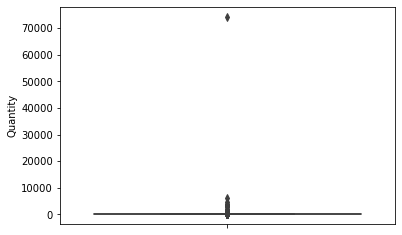

In [31]:
#Look at a boxplot of numerical columns to identify possible outliers
sns.boxplot(y='Quantity', data=df)

In [32]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Quantity', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
61619,541431,23166,74215,2011-01-18,1.04,12346,United Kingdom
432177,530715,17003,6336,2010-11-04,0.19,15838,United Kingdom
358738,524174,85110,4752,2010-09-27,0.07,13687,United Kingdom
97432,544612,22053,3906,2011-02-22,0.82,18087,United Kingdom
298935,518505,21392,3648,2010-08-09,0.13,14277,France
228042,511465,15044A,3500,2010-06-08,2.55,18008,United Kingdom
358736,524174,85160B,2976,2010-09-27,0.13,13687,United Kingdom
507883,536830,84077,2880,2010-12-02,0.18,16754,United Kingdom
432171,530714,21704,1944,2010-11-04,0.72,16754,United Kingdom
298918,518505,85006,1440,2010-08-09,0.31,14277,France


In [33]:
#Remove an outlier row that may be a mistake and then recheck the data
df.drop(labels=61619, axis=0, inplace=True)
df.sort_values('Quantity', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
432177,530715,17003,6336,2010-11-04,0.19,15838,United Kingdom
358738,524174,85110,4752,2010-09-27,0.07,13687,United Kingdom
97432,544612,22053,3906,2011-02-22,0.82,18087,United Kingdom
298935,518505,21392,3648,2010-08-09,0.13,14277,France
228042,511465,15044A,3500,2010-06-08,2.55,18008,United Kingdom


<AxesSubplot:ylabel='Price'>

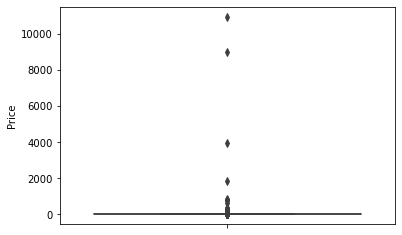

In [34]:
#Look at a boxplot of another numerical column to identify possible outliers
sns.boxplot(y='Price', data=df)

In [35]:
#Sort the values of the column descending to identify possible outliers
df.sort_values('Price', ascending=False).head(10)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
135013,502263,M,1,2010-03-23,10953.50,12918,United Kingdom
74356,496115,M,1,2010-01-29,8985.60,17949,United Kingdom
406406,571751,M,1,2011-10-19,3949.32,12744,Singapore
322140,520750,M,1,2010-08-31,1868.56,15480,Malta
228919,511520,M,1,2010-06-08,849.45,14308,United Kingdom
292749,517934,M,1,2010-08-03,800.00,12748,United Kingdom
48348,493900,M,1,2010-01-08,780.52,14911,EIRE
407877,528420,M,1,2010-10-22,780.25,14911,EIRE
416464,572552,DOT,1,2011-10-24,638.30,14096,United Kingdom
106398,545332,M,1,2011-03-01,376.50,12352,Norway


In [36]:
#Remove outlier rows that may be mistakes and recheck the data
df.drop(df[df['Price'] > 1000].index, axis=0, inplace = True)
df.sort_values('Price', ascending=False).head(5)

,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
228919,511520,M,1,2010-06-08,849.45,14308,United Kingdom
292749,517934,M,1,2010-08-03,800.00,12748,United Kingdom
48348,493900,M,1,2010-01-08,780.52,14911,EIRE
407877,528420,M,1,2010-10-22,780.25,14911,EIRE
416464,572552,DOT,1,2011-10-24,638.30,14096,United Kingdom


In [37]:
#Check how many rows you have now
df.shape

(78295, 7)

In [38]:
#Reset the index
df=df.reset_index()
df.head()

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
0,9,489435,22349,12,2009-12-01,3.75,13085,United Kingdom
1,15,489436,84879,16,2009-12-01,1.69,13078,United Kingdom
2,13,489436,21755,18,2009-12-01,5.45,13078,United Kingdom
3,53,489437,22112,3,2009-12-01,4.95,15362,United Kingdom
4,73,489439,22139,9,2009-12-01,4.95,12682,France


### f. Remove extra spaces in a column with text

In [39]:
#Remove leading and trailing white spaces from a column with strings
df['Country'] = df['Country'].str.strip()
df

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country
0,9,489435,22349,12,2009-12-01,3.75,13085,United Kingdom
1,15,489436,84879,16,2009-12-01,1.69,13078,United Kingdom
2,13,489436,21755,18,2009-12-01,5.45,13078,United Kingdom
3,53,489437,22112,3,2009-12-01,4.95,15362,United Kingdom
4,73,489439,22139,9,2009-12-01,4.95,12682,France
...,...,...,...,...,...,...,...,...
78290,516227,579885,22156,10,2011-11-30,0.85,15444,United Kingdom
78291,516286,579885,22988,12,2011-11-30,1.25,15444,United Kingdom
78292,516226,579885,21446,6,2011-11-30,1.25,15444,United Kingdom
78293,516319,579885,23027,6,2011-11-30,2.08,15444,United Kingdom


# 4. Feature Engineering 

### a. Combine categories within a categorical variable

In [40]:
#List columns that are categorical (not numerical)
df.select_dtypes(['object']).columns

Index(['InvoiceNo', 'StockCode', 'Country'], dtype='object')

In [41]:
#For each relevant categorical variable column, look at the counts for each value to see if an infrequent category needs to be dropped or combined with another category.
#See what values are in the column and count how many are in each category.
df['Country'].value_counts()

United Kingdom          70463
Germany                  1646
EIRE                     1513
France                   1321
Netherlands               524
Spain                     366
Belgium                   308
Switzerland               307
Portugal                  236
Australia                 189
Channel Islands           156
Norway                    136
Italy                     135
Sweden                    129
Cyprus                    124
Finland                   111
Austria                    79
Denmark                    72
Greece                     66
Japan                      54
Poland                     51
United Arab Emirates       43
USA                        42
Singapore                  37
Israel                     35
Malta                      28
Lithuania                  23
Iceland                    21
Canada                     17
RSA                        13
Korea                       9
Bahrain                     8
West Indies                 6
Lebanon   

In [42]:
#Get a list of the categories in the categorical variable to get ready to copy and paste what you want to combine.
df['Country'].unique()

array(['United Kingdom', 'France', 'Germany', 'EIRE', 'Portugal',
       'Poland', 'Channel Islands', 'Netherlands', 'Spain', 'Cyprus',
       'Belgium', 'Greece', 'Norway', 'Austria', 'United Arab Emirates',
       'Italy', 'Switzerland', 'Australia', 'Sweden', 'USA', 'Denmark',
       'Finland', 'Malta', 'RSA', 'Japan', 'Singapore', 'Bahrain',
       'Israel', 'Thailand', 'Lithuania', 'Nigeria', 'West Indies',
       'Brazil', 'Canada', 'Iceland', 'Korea', 'Lebanon', 'Czechia',
       'European Community'], dtype=object)

In [43]:
#Combine a few of the smaller categories into an 'Other' category and make the change permenant.
#Then look at the new value counts.
df['Country']=df['Country'].replace(['Lebanon', 'Czechia', 'Saudi Arabia','United Arab Emirates', 'Bahrain', 'RSA', 'European Community', 'Lithuania'], 'Other')
df['Country'].value_counts()

United Kingdom     70463
Germany             1646
EIRE                1513
France              1321
Netherlands          524
Spain                366
Belgium              308
Switzerland          307
Portugal             236
Australia            189
Channel Islands      156
Norway               136
Italy                135
Sweden               129
Cyprus               124
Finland              111
Other                102
Austria               79
Denmark               72
Greece                66
Japan                 54
Poland                51
USA                   42
Singapore             37
Israel                35
Malta                 28
Iceland               21
Canada                17
Korea                  9
West Indies            6
Thailand               5
Brazil                 4
Nigeria                3
Name: Country, dtype: int64

### b. Create a new date column using datetime data

In [44]:
#Make new columns for Year and Month using a date-time column
df['Year']=df['Date'].apply(lambda date : date.year)
df['Month']=df['Date'].apply(lambda date : date.month)
df.head(2)

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month
0,9,489435,22349,12,2009-12-01,3.75,13085,United Kingdom,2009,12
1,15,489436,84879,16,2009-12-01,1.69,13078,United Kingdom,2009,12


In [45]:
#Look at the value counts for the new 'Year' column
df['Year'].value_counts()

2010    40063
2011    35165
2009     3067
Name: Year, dtype: int64

### c. Create a new column of data using numerical data

In [46]:
# Create a TotalSum colummn by multiplying two columns to see total spent for that person for that transaction
df["TotalSum"] = df["Quantity"] * df["Price"]
df.head(2)

,index,InvoiceNo,StockCode,Quantity,Date,Price,CustomerID,Country,Year,Month,TotalSum
0,9,489435,22349,12,2009-12-01,3.75,13085,United Kingdom,2009,12,45.00
1,15,489436,84879,16,2009-12-01,1.69,13078,United Kingdom,2009,12,27.04


### d. Reorder Columns

In [47]:
#Get the column names before you reorder them
df.columns

Index(['index', 'InvoiceNo', 'StockCode', 'Quantity', 'Date', 'Price',
       'CustomerID', 'Country', 'Year', 'Month', 'TotalSum'],
      dtype='object')

In [48]:
#Reorder columns so that they look the way we like.
df=df[['InvoiceNo', 'StockCode', 'Date', 'Year', 'Month', 'Quantity','Price', 'TotalSum','CustomerID','Country']]
df.head(2)

,InvoiceNo,StockCode,Date,Year,Month,Quantity,Price,TotalSum,CustomerID,Country
0,489435,22349,2009-12-01,2009,12,12,3.75,45.00,13085,United Kingdom
1,489436,84879,2009-12-01,2009,12,16,1.69,27.04,13078,United Kingdom


### e. Pivot to create a new data frame

In [49]:
#Find most recent date in the transactions to use as a reference point. We'll call it refdate.
#We'll add one day to the newest date, so the most recent date in our data can get included in the analysis.
refdate = max(df.Date) + dt.timedelta(days=1) 
refdate

Timestamp('2011-12-01 00:00:00')

In [50]:
#Aggregate Recency, Frequency, and Monetary Value Data by each customer and create a new data frame for it. 
    #Recency is number of days between last purchase and most recent date in the data.
    #Frequency is the number of times that customer has made a purchase.
    #Monetary value is the total amount of money that customer has spent so far.

#Group the rows for each customer.
#Get each customer's most recent transaction date and subtract it from the reference date.
#Count the number of transactions for each customer.
#Sum the total dollars spent by each customer.
#Rename the columns and look at the new data frame
df2 = df.groupby(['CustomerID']).agg({'Date': lambda x: (refdate - x.max()).days,'InvoiceNo': 'count', 'TotalSum': 'sum'})
df2.rename(columns = {'Date': 'Recency (Days)', 'InvoiceNo': 'Frequency (Total Purchases)', 'TotalSum': 'Monetary Value'}, inplace=True)
df2.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value
CustomerID,,,
12346,713,1,1.00
12347,31,21,386.80
12348,310,3,68.16
12349,10,18,643.01
12350,302,1,15.00


In [51]:
#Get info on the new dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5206 entries, 12346 to 18287
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Recency (Days)               5206 non-null   int64  
 1   Frequency (Total Purchases)  5206 non-null   int64  
 2   Monetary Value               5206 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 162.7 KB


# 5a. Exploratory Data Analysis of 1st Dataframe: Univariate 

### a. Look at the head of the first data frame

In [52]:
df.head()

,InvoiceNo,StockCode,Date,Year,Month,Quantity,Price,TotalSum,CustomerID,Country
0,489435,22349,2009-12-01,2009,12,12,3.75,45.00,13085,United Kingdom
1,489436,84879,2009-12-01,2009,12,16,1.69,27.04,13078,United Kingdom
2,489436,21755,2009-12-01,2009,12,18,5.45,98.10,13078,United Kingdom
3,489437,22112,2009-12-01,2009,12,3,4.95,14.85,15362,United Kingdom
4,489439,22139,2009-12-01,2009,12,9,4.95,44.55,12682,France


### b. Categorical variables

In [53]:
#Get info on columns of categorical variables and their values.
df.describe(include='object').transpose()

,count,unique,top,freq
InvoiceNo,78295,25196,576339,54
StockCode,78295,4007,85123A,491
Country,78295,33,United Kingdom,70463


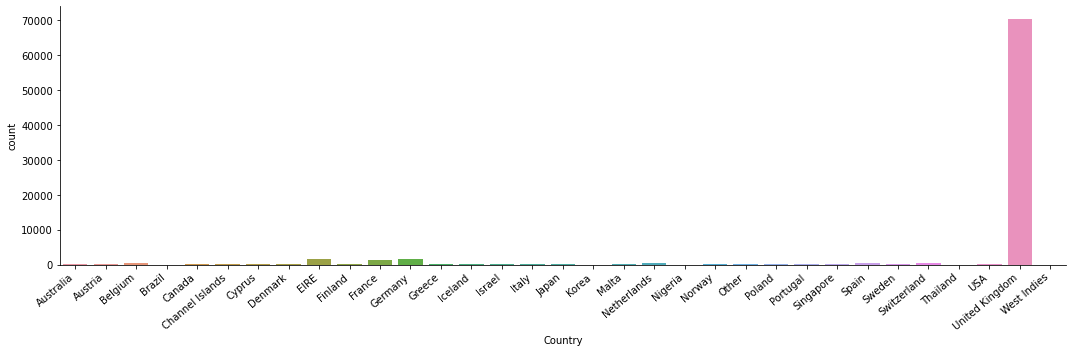

In [54]:
#Look at counts in bar charts
#Make a countplot for a categorical variable column and list each bar in alphabetical order
#Put the items on the x axis in alphabetical order.
plt.figure(figsize=(15,5))
country_order=sorted(df['Country'].unique())
sns.countplot(x='Country', data=df, order=country_order).set_xticklabels(sns.countplot(x='Country', data=df, order=country_order).get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
sns.despine()

### c. Numeric variables

In [55]:
#Get descriptive statistics for each column of continuous data
df.describe().transpose().applymap('{:,.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
Year,"78,295.00","2,010.41",0.57,"2,009.00","2,010.00","2,010.00","2,011.00","2,011.00"
Month,"78,295.00",7.42,3.42,1.00,5.00,8.00,11.00,12.00
Quantity,"78,295.00",12.98,54.08,1.00,2.00,5.00,12.00,"6,336.00"
Price,"78,295.00",3.08,8.10,0.00,1.25,1.95,3.75,849.45
TotalSum,"78,295.00",21.57,66.55,0.00,4.95,11.90,19.50,"8,925.00"
CustomerID,"78,295.00","15,331.39","1,697.19","12,346.00","13,980.00","15,271.00","16,805.50","18,287.00"


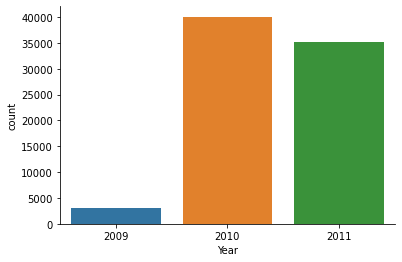

In [56]:
# Make countplots for datetime data
sns.countplot(x='Year', data=df)
sns.despine()

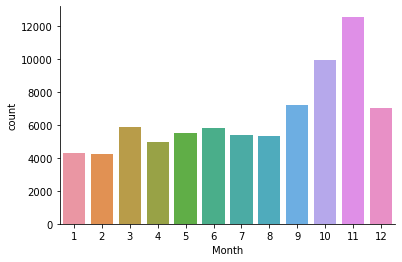

In [57]:
# Make countplots for datetime data
sns.countplot(x='Month', data=df)
sns.despine()

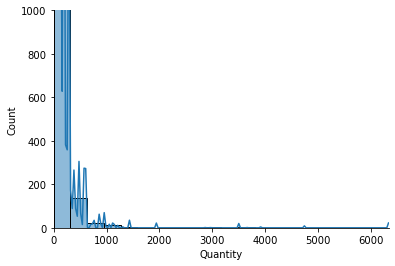

In [58]:
# Look at distributions in histograms
g1=sns.histplot(df['Quantity'], kde=True, bins=20) 
g1.set_xlim([0,max(df['Quantity'])])
g1.set_ylim([0,1000])
sns.despine()

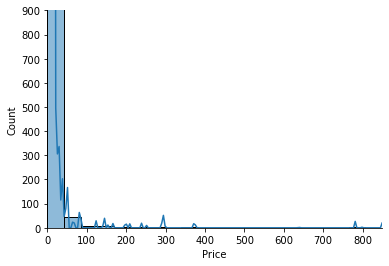

In [59]:
# Look at distributions in histograms
g1=sns.histplot(df['Price'], kde=True, bins=20) 
g1.set_xlim([0,max(df['Price'])])
g1.set_ylim([0,900])
sns.despine()

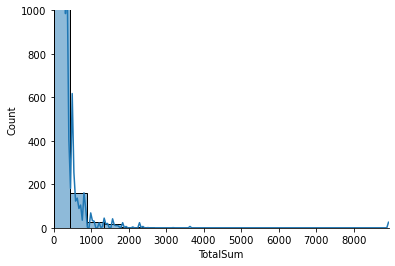

In [60]:
# Look at distributions in histograms
g1=sns.histplot(df['TotalSum'], kde=True, bins=20) 
g1.set_xlim([0,max(df['TotalSum'])])
g1.set_ylim([0,1000])
sns.despine()

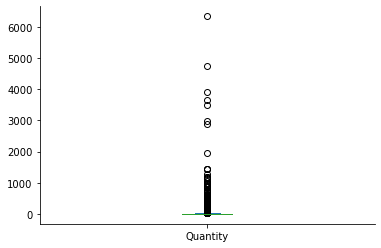

In [61]:
#Look at distributions in boxplots
df['Quantity'].plot.box()
sns.despine()

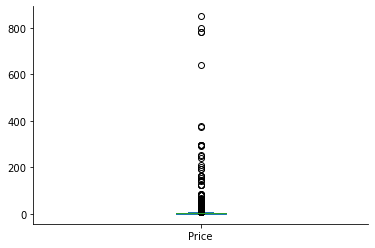

In [62]:
#Look at distributions in boxplots
df['Price'].plot.box()
sns.despine()

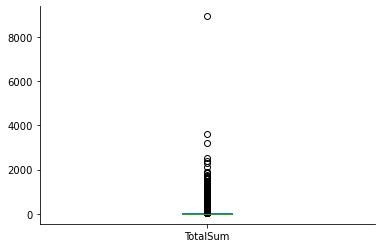

In [63]:
#Look at distributions in boxplots
df['TotalSum'].plot.box()
sns.despine()

# 5b. Exploratory Data Analysis of 1st Data Frame: Multivariate 

### a. Look at variables in a pairplot

In [64]:
df.head()

,InvoiceNo,StockCode,Date,Year,Month,Quantity,Price,TotalSum,CustomerID,Country
0,489435,22349,2009-12-01,2009,12,12,3.75,45.00,13085,United Kingdom
1,489436,84879,2009-12-01,2009,12,16,1.69,27.04,13078,United Kingdom
2,489436,21755,2009-12-01,2009,12,18,5.45,98.10,13078,United Kingdom
3,489437,22112,2009-12-01,2009,12,3,4.95,14.85,15362,United Kingdom
4,489439,22139,2009-12-01,2009,12,9,4.95,44.55,12682,France


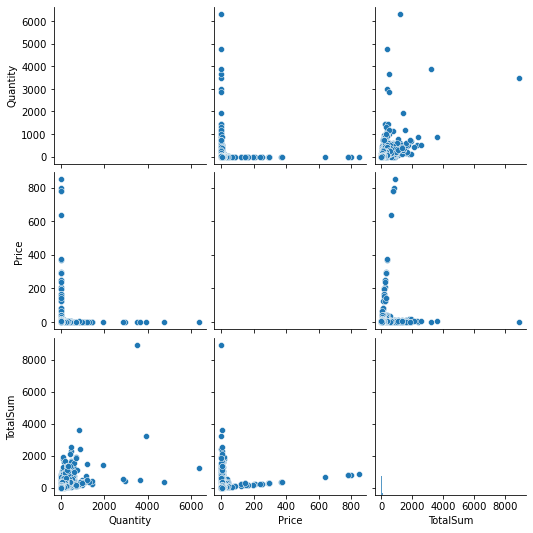

In [65]:
#Do a pairplot for interesting variables
sns.pairplot(df, vars = df.columns[5:8], palette='Dark2')

### b. Charts of numeric variables by categorical variables.

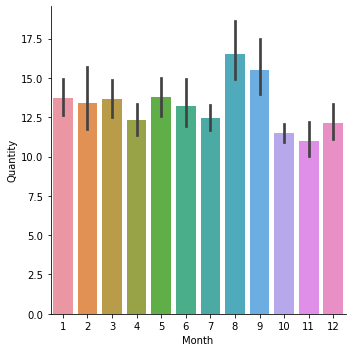

In [66]:
sns.catplot(x='Month', y='Quantity', data=df, kind='bar')

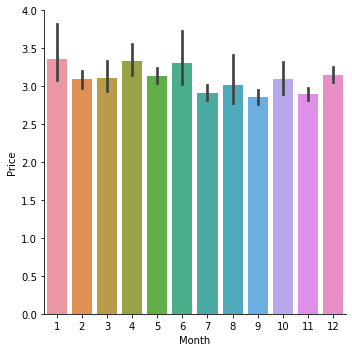

In [67]:
sns.catplot(x='Month', y='Price', data=df, kind='bar')

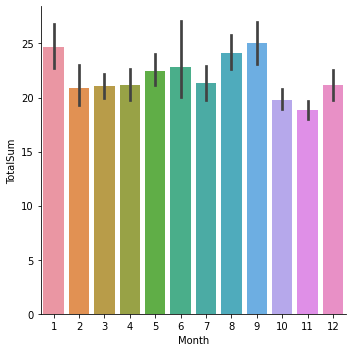

In [68]:
sns.catplot(x='Month', y='TotalSum', data=df, kind='bar')

### c. Charts of time series trends

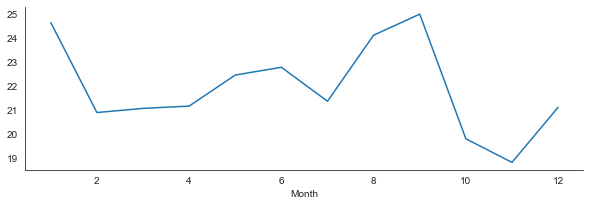

In [69]:
#Look at average total spent per customer in each month of the year
sns.set_style('white')
plt.figure(figsize=(10,3))
df.groupby('Month').mean()['TotalSum'].plot()
sns.despine()

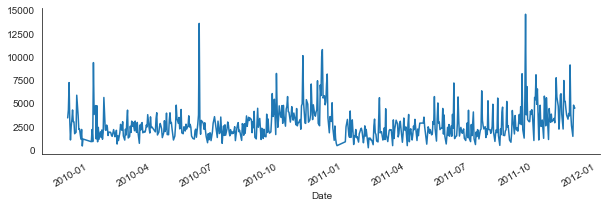

In [70]:
#Total revenue per day
sns.set_style('white')
plt.figure(figsize=(10,3))
df.groupby('Date').sum()['TotalSum'].plot()
sns.despine()

### d. Correlations matrix using numeric variables

<AxesSubplot:>

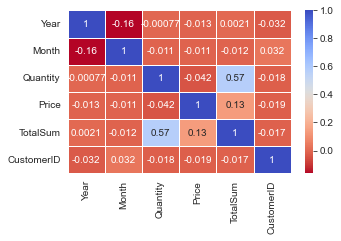

In [71]:
#Look at correlations between variables in a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), cmap='coolwarm_r', linecolor='white', linewidths=1, annot=True)  

### e. View 3 variables together

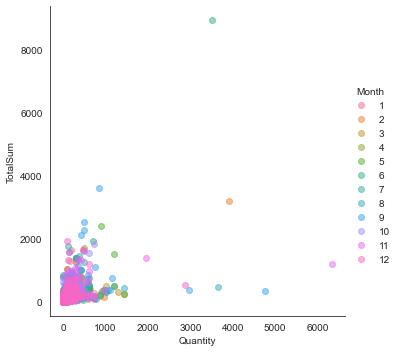

In [72]:
sns.lmplot(x='Quantity', y='TotalSum', data=df, hue='Month', fit_reg=False, scatter_kws={'alpha':0.5});

# 6a. Exploratory Data Analysis of 2nd Dataframe: Univariate 

### a. Look at the head of the data frame

In [73]:
df2.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value
CustomerID,,,
12346,713,1,1.00
12347,31,21,386.80
12348,310,3,68.16
12349,10,18,643.01
12350,302,1,15.00


### b. Categorical variables

In [74]:
#None for this dataframe

### c. Numeric variables

In [75]:
#Get descriptive statistics for each column of continuous data
df2.describe().transpose().applymap('{:,.2f}'.format)

,count,mean,std,min,25%,50%,75%,max
Recency (Days),"5,206.00",208.84,207.41,1.00,29.00,120.00,381.00,730.00
Frequency (Total Purchases),"5,206.00",15.04,35.89,1.00,3.00,6.00,16.00,"1,228.00"
Monetary Value,"5,206.00",324.38,"1,436.37",0.42,40.01,100.48,261.87,"52,841.96"


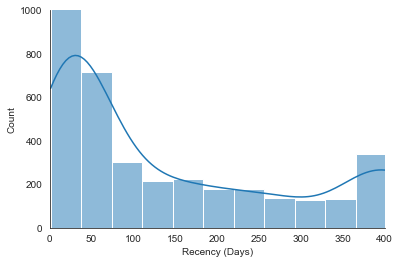

In [76]:
#Look at distributions in histograms
g1=sns.histplot(df2['Recency (Days)'], kde=True, bins=20); 
g1.set_xlim([0,400])
g1.set_ylim([0,1000])
sns.despine()

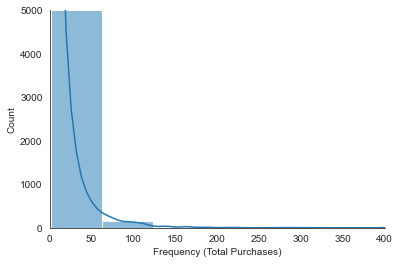

In [77]:
# Look at distributions in histograms
g1=sns.histplot(df2['Frequency (Total Purchases)'], kde=True, bins=20); 
g1.set_xlim([0,400])
g1.set_ylim([0,5000])
sns.despine()

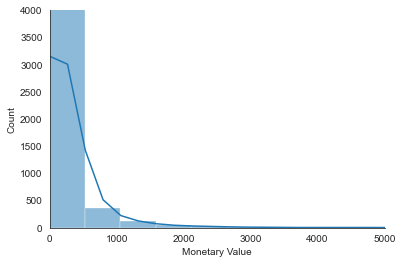

In [78]:
# Look at distributions in histograms
g1=sns.histplot(df2['Monetary Value'], kde=True, bins=100); 
g1.set_xlim([0,5000])
g1.set_ylim([0,4000])
sns.despine()

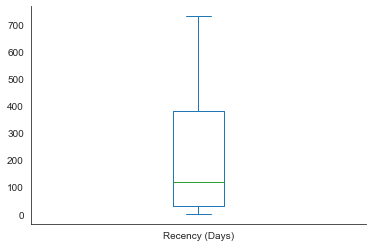

In [79]:
df2['Recency (Days)'].plot.box()
sns.despine()

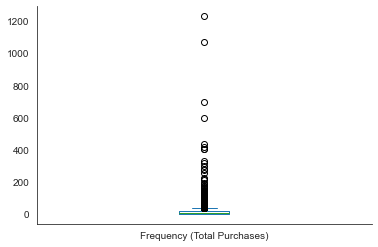

In [80]:
df2['Frequency (Total Purchases)'].plot.box()
sns.despine()

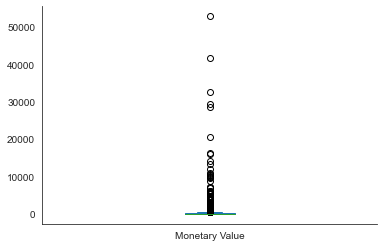

In [81]:
df2['Monetary Value'].plot.box()
sns.despine()

# 6b. Exploratory Data Analysis of 2nd Data Frame: Multivariate 

### a. Look at variables in a pairplot

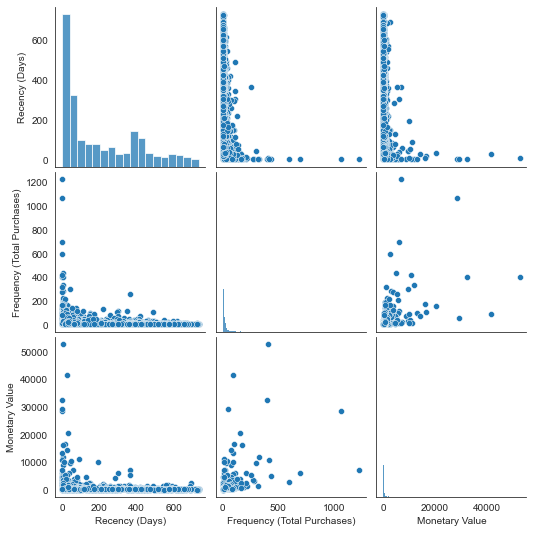

In [82]:
#Do a pairplot
sns.pairplot(df2, palette='Dark2');

### b. Correlations matrix using numeric variables

<AxesSubplot:>

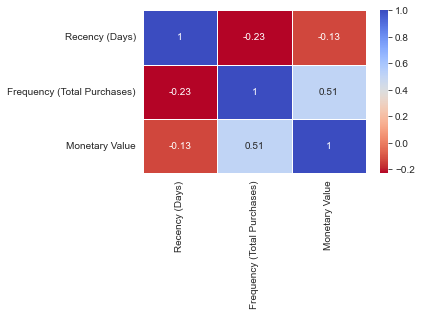

In [83]:
#Look at correlations between variables in a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(df2.corr(), cmap='coolwarm_r', linecolor='white', linewidths=1, annot=True)  

# 7. K-Means Cluster Analysis

### a. Import libraries for clustering

In [84]:
#Import Libararies for K-Means Clustering
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

### b. Find the Transformation that reduces skewness the most

In [85]:
#Transform the data using log transformation and get the skewness of each variable
sk1a=(np.log(df2['Recency (Days)'])).skew()
sk1b=(np.log(df2['Frequency (Total Purchases)'])).skew()
sk1c=(np.log(df2['Monetary Value'])).skew()
sk1 = [sk1a,sk1b,sk1c]
labels = ['Recency (Days)','Frequency (Total Purchases)', 'Monetary Value']
skewness1 = pd.DataFrame(sk1,labels,['Log Transformation'])
skewness1

#Transform the data using square root transformation and get the skewness of each variable
sk2a=(np.sqrt(df2['Recency (Days)'])).skew()
sk2b=(np.sqrt(df2['Frequency (Total Purchases)'])).skew()
sk2c=(np.sqrt(df2['Monetary Value'])).skew()
sk2 = [sk2a,sk2b,sk2c]
labels = ['Recency (Days)','Frequency (Total Purchases)', 'Monetary Value']
skewness2 = pd.DataFrame(sk2,labels,['Sqrt Transformation'])
skewness2

#Do a box-cox transformation and calculate skewness. Only use if the data is positive.
from scipy import stats
sk3a=pd.Series((stats.boxcox(df2['Recency (Days)']))[0]).skew()
sk3b=pd.Series((stats.boxcox(df2['Frequency (Total Purchases)']))[0]).skew()
sk3c=pd.Series((stats.boxcox(df2['Monetary Value']))[0]).skew()
sk3 = [sk3a,sk3b,sk3c]
labels = ['Recency (Days)','Frequency (Total Purchases)', 'Monetary Value']
skewness3 = pd.DataFrame(sk3,labels,['Box Cox Transformation'])
skewness3

skewness = pd.DataFrame()
skewness ['Log Transformation'] = skewness1
skewness ['Square root Transformation'] =skewness2
skewness ['Box Cox Transformation'] = skewness3
skewness

,Log Transformation,Square root Transformation,Box Cox Transformation
Recency (Days),-0.686670,0.269834,-0.145806
Frequency (Total Purchases),0.292894,3.098781,0.025386
Monetary Value,0.184182,5.573777,-0.004795


In [86]:
#Transform each column with skewed data and put each new column into a new dataframe.
deskew1 = pd.DataFrame()
deskew1['Recency (Days)'] = stats.boxcox(df2['Recency (Days)'])[0]
deskew1['Frequency (Total Purchases)'] = stats.boxcox(df2['Frequency (Total Purchases)'])[0]
deskew1['Monetary Value'] = stats.boxcox(df2['Monetary Value'])[0]
deskew1.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value
0,15.294728,0.000000,0.000000
1,5.220970,2.621419,5.306678
2,11.879804,1.039926,3.887521
3,3.032306,2.507145,5.704010
4,11.782800,0.000000,2.567775


### c. Normalize the data

In [87]:
#Normalize the deskewed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(deskew1)
normalized1 = scaler.transform(deskew1)
#Convert the normalized data from an array into a dataframe
norm1=pd.DataFrame(normalized1)
norm1.rename(columns = {0: 'Recency',1: 'Frequency',2: 'MonetaryValue'}, inplace=True)
norm1.head()

,Recency,Frequency,MonetaryValue
0,1.583181,-1.688762,-3.649140
1,-0.815870,0.953082,0.951991
2,0.769922,-0.640733,-0.278483
3,-1.337097,0.837917,1.296496
4,0.746821,-1.688762,-1.422762


### d. Use the Elbow Method to Determine the Number of Clusters

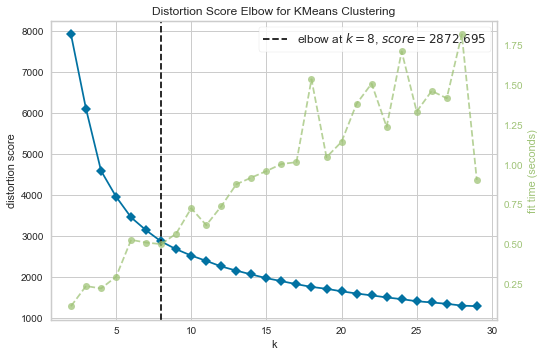

In [88]:
#Select the range of number of clusters to consider for the Elbow Method.
from yellowbrick.cluster import KElbowVisualizer
model1 = KMeans()
visualizer = KElbowVisualizer(model1, k=(2,30), timings= True)
visualizer.fit(norm1) 
visualizer.show();

### e. Fit the model

In [89]:
#Create an instance of the K Means model and fit it to the data using the optimal number of clusters.
model = KMeans(n_clusters=8, random_state=101)
model.fit(norm1)

KMeans(random_state=101)

In [90]:
#See the paramters for our model. 
model.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': 101,
 'tol': 0.0001,
 'verbose': 0}

In [91]:
#See the cluster center vectors
model.cluster_centers_

array([[-0.66345773, -0.14661264, -0.10237863],
       [-0.09964255,  0.90935608,  0.90266802],
       [ 1.01017377, -0.69132824, -0.57871765],
       [-0.70023207, -1.17442833, -1.17050515],
       [ 0.82650332,  0.18599136,  0.20380994],
       [-1.23663715,  0.77160204,  0.53153878],
       [ 1.05318213, -1.49416677, -1.54392387],
       [-1.19286138,  1.60409689,  1.65745575]])

### f. Get descriptive results for each customer segment

In [92]:
#Add segment labels in a new column to go with each customer's row in the dataframe
df2['Segment']=model.labels_
df2.head(2)

,Recency (Days),Frequency (Total Purchases),Monetary Value,Segment
CustomerID,,,,
12346,713,1,1.0,6
12347,31,21,386.8,5


In [93]:
#Group the rows by cluster and calculate means for each variable for each cluster. 
#Get a count of how many customers are in each cluster.
#Transforms the table by turning rows into columns and columns into rows.
SegDes=df2.groupby('Segment').agg({'Recency (Days)':'mean', 'Frequency (Total Purchases)':['mean','count'], 'Monetary Value':['mean', 'sum']}).round(2).T
SegDes

Segment                                   0          1         2        3  \
Recency (Days)              mean      51.12     119.47    427.52    50.91   
Frequency (Total Purchases) mean       5.91      23.58      3.21     1.93   
                            count    784.00     635.00    960.00   364.00   
Monetary Value              mean     106.27     466.88     55.42    26.19   
                            sum    83313.44  296466.27  53205.32  9531.36   

Segment                                    4          5        6          7  
Recency (Days)              mean      350.86      16.43   446.37      21.32  
Frequency (Total Purchases) mean        9.10      18.82     1.33      72.66  
                            count     820.00     642.00   524.00     477.00  
Monetary Value              mean      167.59     249.08    15.30    1972.42  
                            sum    137419.96  159911.15  8015.42  940846.47

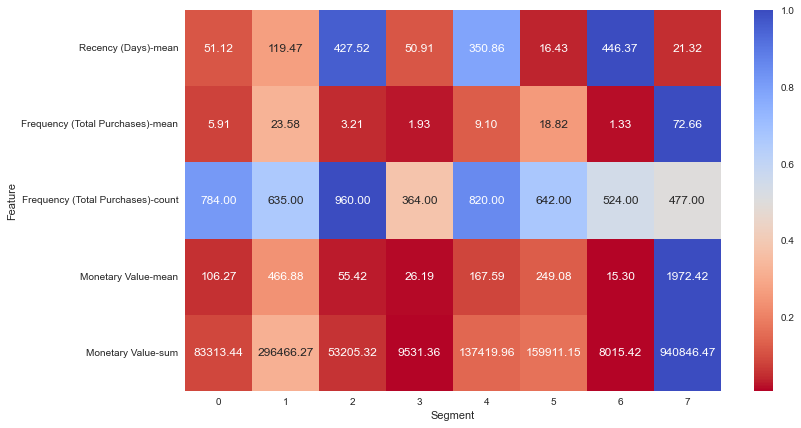

In [94]:
#Make a heatmap of the characteristics of each segment. 
#Normalize numbers and use them to color the heatmap by row but display the segment descriptive numbers.
#Reverse the 'cool warm' colors so big numbers are in blue.
colors1 = SegDes.div(SegDes.max(axis=1), axis=0)
plt.figure(figsize=(12,7))
sns.heatmap(colors1, cmap='coolwarm_r', annot=SegDes, fmt='.2f').set(xlabel='Segment', ylabel='Feature');

In [95]:
SegDes=SegDes.T
SegDes

Recency (Days) Frequency (Total Purchases)        Monetary Value  \
                  mean                        mean  count           mean   
Segment                                                                    
0                51.12                        5.91  784.0         106.27   
1               119.47                       23.58  635.0         466.88   
2               427.52                        3.21  960.0          55.42   
3                50.91                        1.93  364.0          26.19   
4               350.86                        9.10  820.0         167.59   
5                16.43                       18.82  642.0         249.08   
6               446.37                        1.33  524.0          15.30   
7                21.32                       72.66  477.0        1972.42   

                    
               sum  
Segment             
0         83313.44  
1        296466.27  
2         53205.32  
3          9531.36  
4        137419.96  
5        159911.15  
6          8015.42  
7        940846.47

In [96]:
#See the column names to get ready to reorder them.
SegDes.columns

MultiIndex([(             'Recency (Days)',  'mean'),
            ('Frequency (Total Purchases)',  'mean'),
            ('Frequency (Total Purchases)', 'count'),
            (             'Monetary Value',  'mean'),
            (             'Monetary Value',   'sum')],
           )

In [97]:
#Sort segments by mean recency
SegDes=SegDes.sort_values(('Recency (Days)', 'mean'), ascending=True).T
SegDes

Segment                                    5          7        3         0  \
Recency (Days)              mean       16.43      21.32    50.91     51.12   
Frequency (Total Purchases) mean       18.82      72.66     1.93      5.91   
                            count     642.00     477.00   364.00    784.00   
Monetary Value              mean      249.08    1972.42    26.19    106.27   
                            sum    159911.15  940846.47  9531.36  83313.44   

Segment                                    1          4         2        6  
Recency (Days)              mean      119.47     350.86    427.52   446.37  
Frequency (Total Purchases) mean       23.58       9.10      3.21     1.33  
                            count     635.00     820.00    960.00   524.00  
Monetary Value              mean      466.88     167.59     55.42    15.30  
                            sum    296466.27  137419.96  53205.32  8015.42

In [98]:
#Rename columns with more meaningful segment names
SegDes.rename(columns = {5: 'New Medium Spenders', 
                         7: 'New High Spenders', 
                         3: 'Recent Low Spenders',
                         0: 'Recent Medium Spenders',
                         1: 'Recent High Spenders',
                         4: 'Old High Spenders',
                         2: 'Old Medium Spenders',
                         6: 'Old Low Spenders'}, inplace=True)
SegDes.head(5)

Segment                            New Medium Spenders  New High Spenders  \
Recency (Days)              mean                 16.43              21.32   
Frequency (Total Purchases) mean                 18.82              72.66   
                            count               642.00             477.00   
Monetary Value              mean                249.08            1972.42   
                            sum              159911.15          940846.47   

Segment                            Recent Low Spenders  \
Recency (Days)              mean                 50.91   
Frequency (Total Purchases) mean                  1.93   
                            count               364.00   
Monetary Value              mean                 26.19   
                            sum                9531.36   

Segment                            Recent Medium Spenders  \
Recency (Days)              mean                    51.12   
Frequency (Total Purchases) mean                     5.91   
                            count                  784.00   
Monetary Value              mean                   106.27   
                            sum                  83313.44   

Segment                            Recent High Spenders  Old High Spenders  \
Recency (Days)              mean                 119.47             350.86   
Frequency (Total Purchases) mean                  23.58               9.10   
                            count                635.00             820.00   
Monetary Value              mean                 466.88             167.59   
                            sum               296466.27          137419.96   

Segment                            Old Medium Spenders  Old Low Spenders  
Recency (Days)              mean                427.52            446.37  
Frequency (Total Purchases) mean                  3.21              1.33  
                            count               960.00            524.00  
Monetary Value              mean                 55.42             15.30  
                            sum               53205.32           8015.42

In [99]:
#Get the columns to get ready to reorder them
SegDes.columns

Index(['New Medium Spenders', 'New High Spenders', 'Recent Low Spenders',
       'Recent Medium Spenders', 'Recent High Spenders', 'Old High Spenders',
       'Old Medium Spenders', 'Old Low Spenders'],
      dtype='object', name='Segment')

In [100]:
#Reorder the column names by listing them in the order we want
#Format the numbers the way we like
SegDes=SegDes[['New Medium Spenders', 'New High Spenders', 'Recent Low Spenders',
       'Recent Medium Spenders', 'Recent High Spenders', 'Old High Spenders',
       'Old Medium Spenders', 'Old Low Spenders']].T.applymap('{:,.2f}'.format)
SegDes

Recency (Days) Frequency (Total Purchases)          \
                                 mean                        mean   count   
Segment                                                                     
New Medium Spenders             16.43                       18.82  642.00   
New High Spenders               21.32                       72.66  477.00   
Recent Low Spenders             50.91                        1.93  364.00   
Recent Medium Spenders          51.12                        5.91  784.00   
Recent High Spenders           119.47                       23.58  635.00   
Old High Spenders              350.86                        9.10  820.00   
Old Medium Spenders            427.52                        3.21  960.00   
Old Low Spenders               446.37                        1.33  524.00   

                       Monetary Value              
                                 mean         sum  
Segment                                            
New Medium Spenders            249.08  159,911.15  
New High Spenders            1,972.42  940,846.47  
Recent Low Spenders             26.19    9,531.36  
Recent Medium Spenders         106.27   83,313.44  
Recent High Spenders           466.88  296,466.27  
Old High Spenders              167.59  137,419.96  
Old Medium Spenders             55.42   53,205.32  
Old Low Spenders                15.30    8,015.42

In [101]:
#Remember what DF2 looks like
df2.head()

,Recency (Days),Frequency (Total Purchases),Monetary Value,Segment
CustomerID,,,,
12346,713,1,1.00,6
12347,31,21,386.80,5
12348,310,3,68.16,2
12349,10,18,643.01,5
12350,302,1,15.00,6


In [102]:
#Label each customer with their segment name in a new column
df2['Segment Name']=df2['Segment'].map(
    {5: 'New Medium Spenders', 
     7: 'New High Spenders', 
     3: 'Recent Low Spenders',
     0: 'Recent Medium Spenders',
     1: 'Recent High Spenders',
     4: 'Old High Spenders',
     2: 'Old Medium Spenders',
     6: 'Old Low Spenders'})
df2.head(5)

,Recency (Days),Frequency (Total Purchases),Monetary Value,Segment,Segment Name
CustomerID,,,,,
12346,713,1,1.00,6,Old Low Spenders
12347,31,21,386.80,5,New Medium Spenders
12348,310,3,68.16,2,Old Medium Spenders
12349,10,18,643.01,5,New Medium Spenders
12350,302,1,15.00,6,Old Low Spenders


In [103]:
#Let's reorder the data frame by Segment Name Column using a customized order
from pandas.api.types import CategoricalDtype
cat_size_order = CategoricalDtype(['New Medium Spenders', 'New High Spenders', 'Recent Low Spenders',
       'Recent Medium Spenders', 'Recent High Spenders', 'Old High Spenders',
       'Old Medium Spenders', 'Old Low Spenders'], ordered=True)
df2['Segment Name'] = df2['Segment Name'].astype(cat_size_order)
df2=df2.sort_values('Segment Name')
df2

,Recency (Days),Frequency (Total Purchases),Monetary Value,Segment,Segment Name
CustomerID,,,,,
14560,23,16,606.87,5,New Medium Spenders
12963,9,24,477.05,5,New Medium Spenders
16871,14,14,256.73,5,New Medium Spenders
16869,14,15,74.56,5,New Medium Spenders
15584,15,17,117.29,5,New Medium Spenders
...,...,...,...,...,...
16028,587,1,17.00,6,Old Low Spenders
16030,301,1,27.90,6,Old Low Spenders
16038,193,1,17.40,6,Old Low Spenders


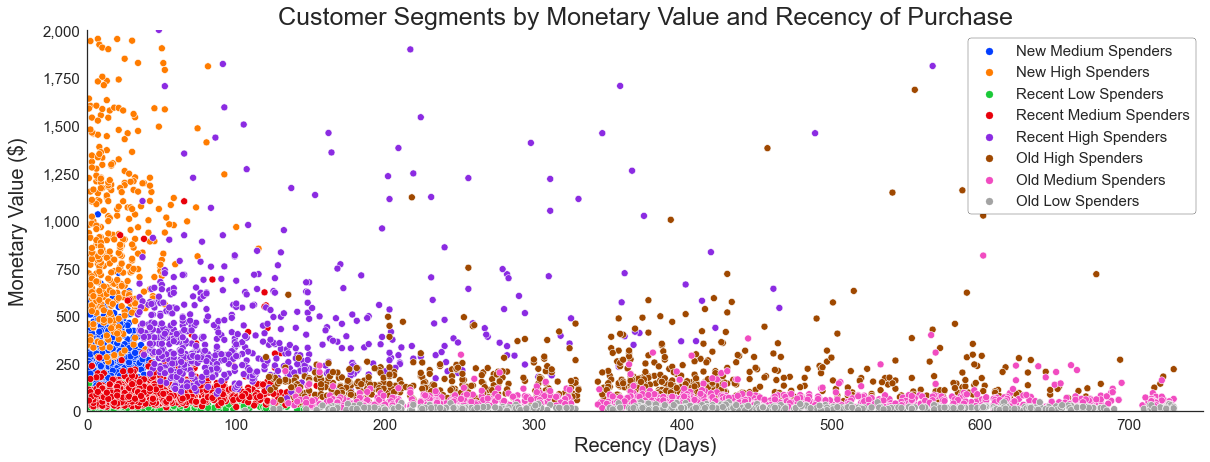

In [165]:
#Compare clusters with a scatterplot. Exclude most outliers to zoom in on where most of the data is.

#Set the size and style
plt.figure(figsize=(20,7))
sns.set_style('white')

#Create an order for the segments in the hue
hue_order = ['New Medium Spenders', 'New High Spenders', 'Recent Low Spenders',
       'Recent Medium Spenders', 'Recent High Spenders', 'Old High Spenders',
       'Old Medium Spenders', 'Old Low Spenders']
sns.scatterplot(x='Recency (Days)', y='Monetary Value', data=df2, hue='Segment Name', palette='bright', hue_order=hue_order)

#Format the legend
legend=plt.legend(loc='upper right', frameon=True, fontsize=15, edgecolor="black", framealpha=1)

#Format the axes
plt.ylim(0, 2000)
plt.xlim(0,750)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.tick_params(axis='both', which='major', labelsize=15)

#Format the titles
plt.title("Customer Segments by Monetary Value and Recency of Purchase", size=25)
plt.xlabel("Recency (Days)", size=20)
plt.ylabel("Monetary Value ($)", size=20, labelpad=15)

sns.despine()

(0.0, 500.0)

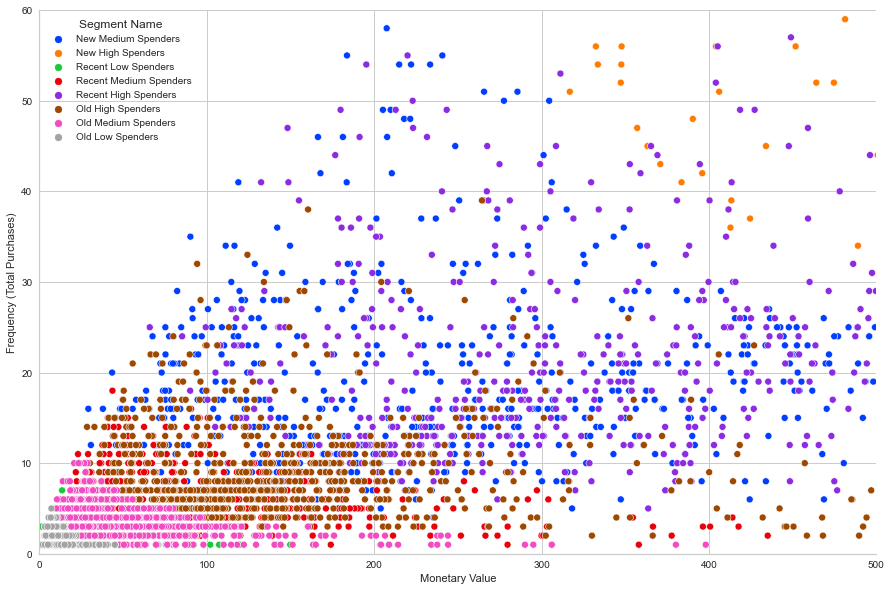

In [105]:
#Compare clusters with a scatterplot. Exclude most outliers to zoom in on where most of the data is.
plt.figure(figsize=(15,10))
sns.scatterplot(x='Monetary Value', y='Frequency (Total Purchases)', data=df2, hue='Segment Name', palette='bright', hue_order=hue_order)
sns.despine()
plt.ylim(0, 60)
plt.xlim(0, 500)

(0.0, 500.0)

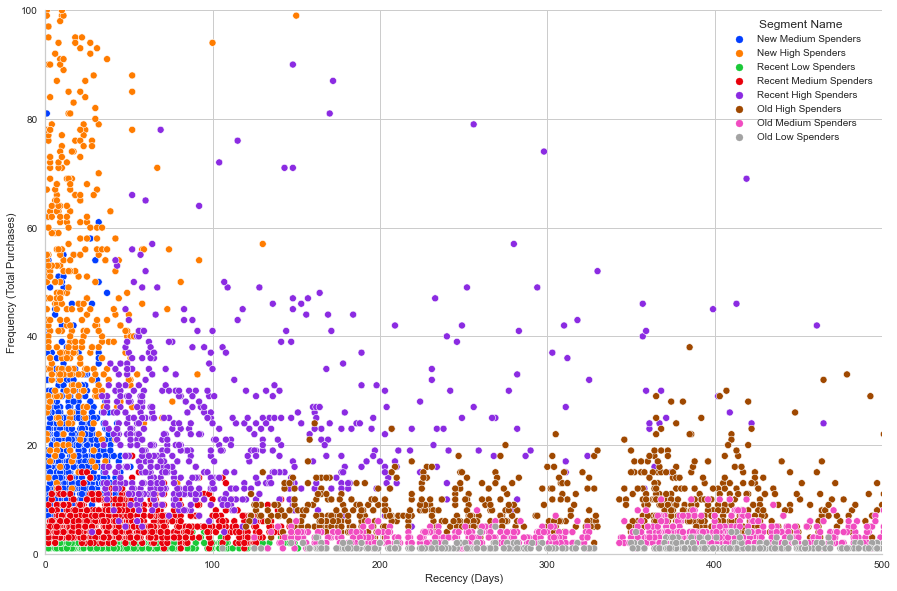

In [106]:
#Compare clusters with a scatterplot. Exclude most outliers to zoom in on where most of the data is.
plt.figure(figsize=(15,10))
sns.scatterplot(x='Recency (Days)', y='Frequency (Total Purchases)', data=df2, hue='Segment Name', palette='bright',hue_order=hue_order)
sns.despine()
plt.ylim(0, 100)
plt.xlim(0, 500)

In [107]:
#Look at our segment descriptions again
SegDes

Recency (Days) Frequency (Total Purchases)          \
                                 mean                        mean   count   
Segment                                                                     
New Medium Spenders             16.43                       18.82  642.00   
New High Spenders               21.32                       72.66  477.00   
Recent Low Spenders             50.91                        1.93  364.00   
Recent Medium Spenders          51.12                        5.91  784.00   
Recent High Spenders           119.47                       23.58  635.00   
Old High Spenders              350.86                        9.10  820.00   
Old Medium Spenders            427.52                        3.21  960.00   
Old Low Spenders               446.37                        1.33  524.00   

                       Monetary Value              
                                 mean         sum  
Segment                                            
New Medium Spenders            249.08  159,911.15  
New High Spenders            1,972.42  940,846.47  
Recent Low Spenders             26.19    9,531.36  
Recent Medium Spenders         106.27   83,313.44  
Recent High Spenders           466.88  296,466.27  
Old High Spenders              167.59  137,419.96  
Old Medium Spenders             55.42   53,205.32  
Old Low Spenders                15.30    8,015.42

In [108]:
#Play a beep when the code is done running
winsound.Beep(550, 1000)

# 8. Interpret Results 

In [109]:
#RQ #1: What clusters do we have in the data?
#Answer: K-Means Clustering identified 8 clusters in the data.
    #The segment that has brought in the most revenue is the 'New High Spenders' segment.They produced total revenue of $940,846.47 with an average most recent purchase date of 21 days ago.
    #The 'New High Spenders' have the highest number of average orders per person at 72.7 orders, so they are likely the most loyal customers and probably have been customers for a while.
    #The 'New Medium Spenders' have purchased items on average 16 days ago and with only 18 average orders, they are most likely newer customers.
    #At the other extreme, the 'Old High Spenders' have not made a purchase in almost a year and when they did they only averaged 9 total purchases. 
    #To better understand why each segment is behaving they way they are, we could conduct a qualitative study through survey or by interviewing some of the people in each segment.